In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales=pd.read_csv("sales_transactions.csv")
sales


,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix
...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi


In [4]:
#1. What is the total revenue generated in the dataset?
sales["Revenue"].sum()

np.int64(29521000)

In [5]:
#2.How many total transactions were recorded?
sales["TransactionID"].nunique()

110

In [6]:
#3. How many distinct customers made purchases?
sales["CustomerID"].nunique()


77

In [7]:
#4. What is the total revenue generated from Lagos alone?
lagos_revenue = sales[sales["City"] == "Lagos"]["Revenue"].sum()
lagos_revenue

np.int64(9285500)

In [8]:
#5. How many units of "Accessories" were sold in Abuja?
abuja_accessories_units = sales[(sales["City"] == "Abuja") & (sales["Category"] == "Accessories")]["UnitsSold"].sum()
abuja_accessories_units

np.int64(22)

In [9]:
#6. What is the average discount offered across all transactions?
average_discount = sales["Discount"].mean()
average_discount

np.float64(3248.181818181818)

In [10]:
sales

,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix
...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi


In [11]:
#7. What was the revenue for February 2024?
sales['Date'] = pd.to_datetime(sales['Date'])

In [12]:
feb_2024_revenue = sales[sales["Date"].dt.to_period("M") == "2024-02"]["Revenue"].sum()
feb_2024_revenue

np.int64(3855000)

In [13]:
#8. Which month had the highest sales revenue?
monthly_revenue = sales.groupby(sales["Date"].dt.to_period("M"))["Revenue"].sum()
highest_revenue_month = monthly_revenue.idxmax()
highest_revenue_month

Period('2024-09', 'M')

In [14]:
#9. Create a measure to calculate monthly revenue trend
monthly_trend = monthly_revenue.reset_index().rename(columns={"Date": "Month", "Revenue": "MonthlyRevenue"})
monthly_trend

,Month,MonthlyRevenue
0,2024-01,2943000
1,2024-02,3855000
2,2024-03,2184500
3,2024-04,1559500
4,2024-05,2484500
5,2024-06,1083000
6,2024-07,1340000
7,2024-08,552500
8,2024-09,4744500
9,2024-10,2739000


In [15]:
bc=monthly_revenue.reset_index().rename(columns={"Date": "Month", "Revenue": "MonthlyRevenue"})
bc

,Month,MonthlyRevenue
0,2024-01,2943000
1,2024-02,3855000
2,2024-03,2184500
3,2024-04,1559500
4,2024-05,2484500
5,2024-06,1083000
6,2024-07,1340000
7,2024-08,552500
8,2024-09,4744500
9,2024-10,2739000


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month'>

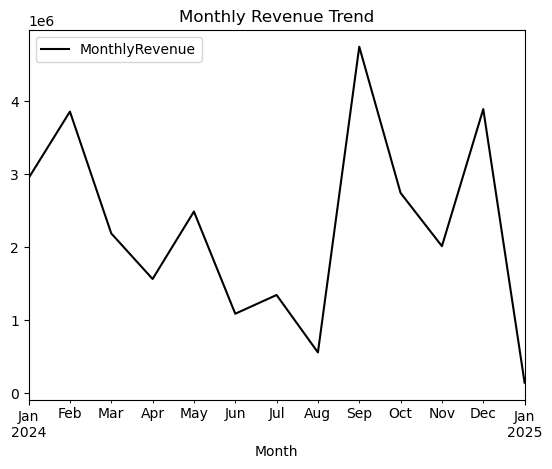

In [16]:
bc.plot(kind="line",y="MonthlyRevenue",x="Month",color="black",title="Monthly Revenue Trend")

In [17]:
sales.groupby(["Date"])["Revenue"].sum().sort_values(ascending=False)

Date
2024-09-22    1407000
2024-09-21     960000
2024-02-05     960000
2024-05-12     948000
2024-01-22     790000
               ...   
2024-06-19      10000
2024-07-04       7000
2024-08-20       7000
2024-05-16       5500
2024-12-05       5000
Name: Revenue, Length: 101, dtype: int64

In [18]:
#10. What is the revenue split between New and Returning customers?
revenue_by_customer_type = sales.groupby("CustomerType")["Revenue"].sum()
revenue_by_customer_type

CustomerType
New          12027000
Returning    17494000
Name: Revenue, dtype: int64

In [19]:
ab=sales.groupby("CustomerType")["Revenue"].sum()
ab

CustomerType
New          12027000
Returning    17494000
Name: Revenue, dtype: int64

<Axes: title={'center': 'Revenue split bwtween customertype'}, ylabel='Revenue'>

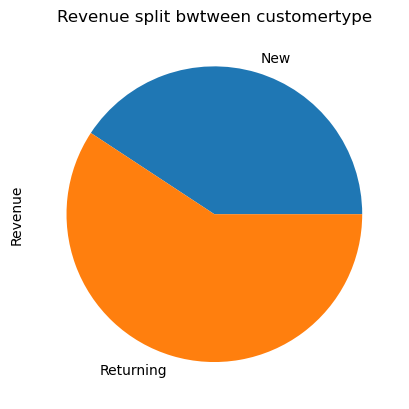

In [20]:
ab.plot(kind="pie",x="CustomerType",y="Revenue",color="red",title="Revenue split bwtween customertype")

In [21]:
#11. What is the average revenue per customer?
avg_revenue_per_customer = sales.groupby("CustomerID")["Revenue"].sum().mean()
avg_revenue_per_customer

np.float64(383389.6103896104)

In [22]:
#12. How many customers bought more than once?
repeat_customers = sales["CustomerID"].value_counts()
customers_bought_more_than_once = (repeat_customers > 1).sum()
customers_bought_more_than_once

np.int64(23)

In [23]:
#13. Which product category generated the most revenue?
category_revenue = sales.groupby("Category")["Revenue"].sum()
top_category = category_revenue.idxmax()
top_category

'Electronics'

In [24]:
sales.groupby(["Category"]).sum(numeric_only=True)["Revenue"].reset_index()

,Category,Revenue
0,Accessories,749000
1,Appliances,9623000
2,Electronics,19149000


In [25]:
b=sales.groupby(["Category"]).sum(numeric_only=True)["Revenue"].reset_index()
b

,Category,Revenue
0,Accessories,749000
1,Appliances,9623000
2,Electronics,19149000


<Axes: title={'center': 'highest revenue by category'}, xlabel='Category'>

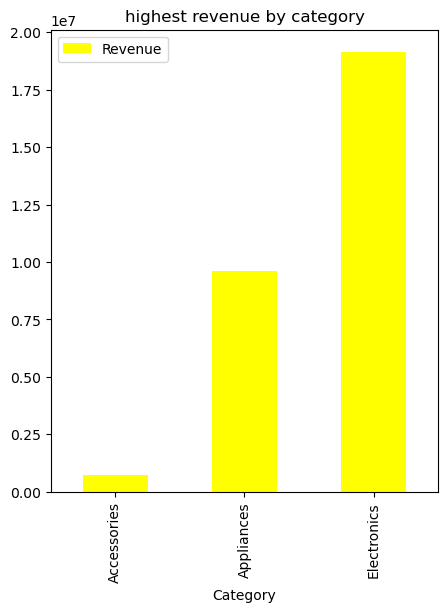

In [26]:
b.plot(kind="bar",x="Category",y="Revenue",color="yellow", title="highest revenue by category",figsize=[5,6])

In [27]:
#14. What is the average revenue per unit for Electronics?
electronics = sales[sales["Category"] == "Electronics"]
avg_revenue_per_unit_electronics = electronics["Revenue"].sum() / electronics["UnitsSold"].sum()
avg_revenue_per_unit_electronics

np.float64(156959.0163934426)

In [28]:
#15. Which sales rep generated the highest total revenue?
sales.groupby(["SalesRep"])["Revenue"].sum().sort_values(ascending =False)

SalesRep
Abdul Salim    10587500
Chuka Obasi     9830500
Mary Felix      9103000
Name: Revenue, dtype: int64

In [29]:
bc=sales.groupby(["SalesRep"])["Revenue"].sum().sort_values(ascending =False)
bc

SalesRep
Abdul Salim    10587500
Chuka Obasi     9830500
Mary Felix      9103000
Name: Revenue, dtype: int64

<Axes: title={'center': 'Highest Revenue Generated by salaesrep'}, xlabel='SalesRep'>

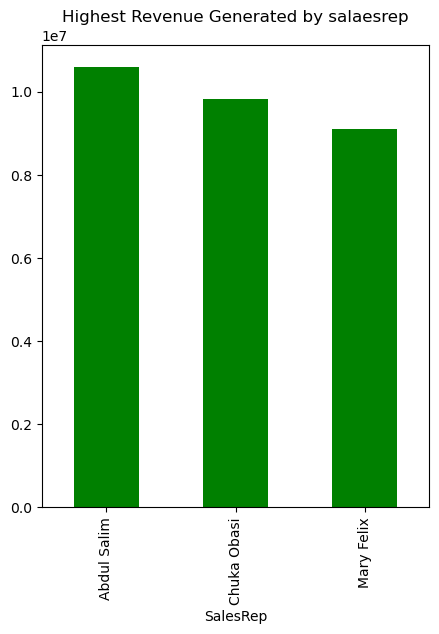

In [30]:
bc.plot(kind="bar",x="SalesRep",y="Revenue",color="green",title="Highest Revenue Generated by salaesrep",figsize=[5,6])

In [31]:
#16. Calculate total units sold by each sales rep.
sales.groupby("SalesRep")["UnitsSold"].sum().reset_index().sort_values("UnitsSold",ascending=False)

,SalesRep,UnitsSold
0,Abdul Salim,134
2,Mary Felix,113
1,Chuka Obasi,110


In [32]:
a=sales.groupby(["SalesRep"]).sum(numeric_only=True)["UnitsSold"].reset_index()
a

,SalesRep,UnitsSold
0,Abdul Salim,134
1,Chuka Obasi,110
2,Mary Felix,113


<Axes: title={'center': 'units sold by salesrep'}, xlabel='SalesRep'>

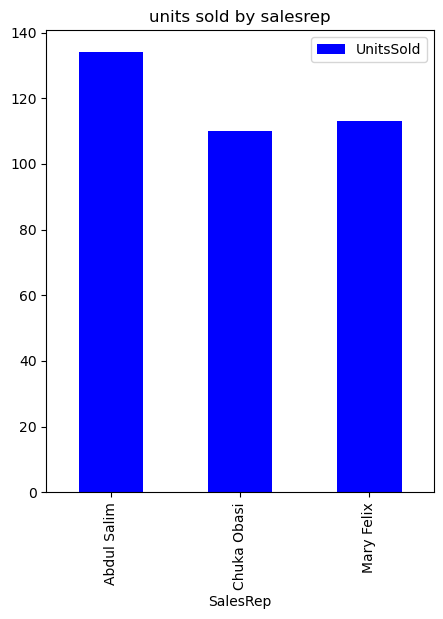

In [33]:
a.plot(kind="bar",x="SalesRep",y="UnitsSold",color="blue", title="units sold by salesrep",figsize=[5,6]) 

In [34]:
#17. Calculates revenue from Lagos only if the customer is "New". (New customers only
lagos_new_revenue = sales[(sales["City"] == "Lagos") & (sales["CustomerType"] == "New")]["Revenue"].sum()
lagos_new_revenue

np.int64(2563000)

In [35]:
 #18. Calculate the total revenue excluding transactions from Port Harcourt.

In [39]:
revenue_excluding_ph = sales[sales["City"] != "Port Harcourt"]["Revenue"].sum()
revenue_excluding_ph

np.int64(22559000)

In [37]:
#19. Calculate average units sold per transaction.
sales.groupby("TransactionID")["UnitsSold"].sum().mean()

np.float64(3.2454545454545456)

In [38]:
#20. Calculate the total discount value across all sales.
sales["Discount"].sum()

np.int64(357300)